Name-Siddhika Rakshe


Class- BE CSE IS2


Roll no-2173199


#AIM-

Develop an Autoencoder to encode and decode the image. Analyse the results.
    a) Develop AE for MNISTdataset
    b) Use output of AE as input toCNN

#    OBJECTIVES :

        1. To learnAE
        2. To implementAE

#THEORY

What are autoencoders?

Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.


Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data.



Autoencoder Components:


Autoencoders consists of 4 main parts:


1- Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.


2- Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.


3- Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.


4- Reconstruction Loss: This is the method that measures measure how well the decoder is performing and how close the output is to the original input.


The training then involves using back propagation in order to minimize the network’s reconstruction loss.



DATASET USED AND ITS ATTRIBUTES:

There are 2 datasets that have been used for the implementation of Autoencoders on it. The first part, in which encoder and decoder has been implemented makes use of the Fashion MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images consisting of
a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The classes include types of clothing such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listedbelow.



    • 0: T-shirt/top
    • 1: Trouser
    • 2: Pullover
    • 3: Dress
    • 4: Coat
    • 5: Sandal
    • 6: Shirt
    • 7: Sneaker
    • 8:Bag
    • 9: Ankleboot


Another dataset that has been used is the MNIST dataset. 

Autoencoder implementation has been performed on this dataset and the output of this dataset is used as the input for CNN model. The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.


# CODE

## Libraries

In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [ ]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
input_img= Input(shape=(784,))

In [ ]:
encoded = Dense(units=32, activation='relu')(input_img)

In [ ]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [ ]:
autoencoder=Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6948 - accuracy: 0.0019 - val_loss: 0.6946 - val_accuracy: 0.0014
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6945 - accuracy: 0.0019 - val_loss: 0.6944 - val_accuracy: 0.0014
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - accuracy: 0.0019 - val_loss: 0.6941 - val_accuracy: 0.0014
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6940 - accuracy: 0.0019 - val_loss: 0.6938 - val_accuracy: 0.0013
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6937 - accuracy: 0.0018 - val_loss: 0.6936 - val_accuracy: 0.0012
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6935 - accuracy: 0.0018 - val_loss: 0.6934 - val_accuracy: 0.0011
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6933 - accuracy: 0.0017 - val_loss: 0.6931 - val_accuracy: 0.0011

In [ ]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

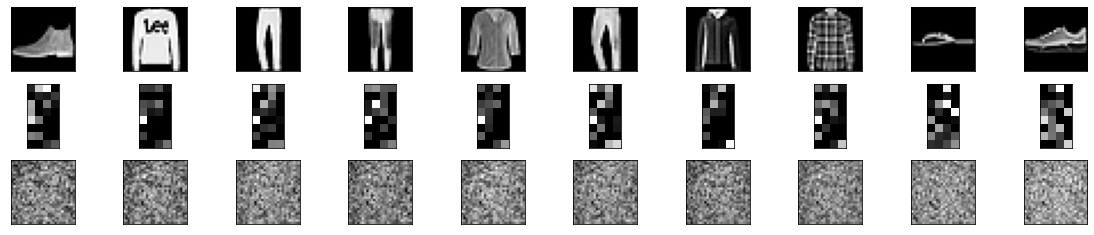

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()

# DATASET
The Fashion-MNIST dataset contains 60,000 training images (and 10,000 test images) of fashion and clothing items, taken from 10 classes. Each image is a standardized 28×28 size in grayscale (784 total pixels).
# CONCLUSION
We use tensorflow auto encoder on fashion mnist dataset and learn  to encode and decode 